\centerline{\includegraphics[width=\linewidth]{Ai_lab.jpg}}

# **K-Means Clustering with Python**



**K-Means clustering** is the most popular unsupervised machine learning algorithm. K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them. In this lab exercise, we will implement K-Means clustering to find intrinsic groups within the dataset that display the same `status_type` behaviour. The `status_type` behaviour variable consists of posts of a different nature (video, photos, statuses and links).


So, let's get started.

# **Introduction to K-Means Clustering** 


Machine learning algorithms can be broadly classified into two categories - supervised and unsupervised learning. There are other categories also like semi-supervised learning and reinforcement learning. But, most of the algorithms are classified as supervised or unsupervised learning. The difference between them happens because of presence of target variable. In unsupervised learning, there is no target variable. The dataset only has input variables which describe the data. This is called unsupervised learning.

**K-Means clustering** is the most popular unsupervised learning algorithm. It is used when we have unlabelled data which is data without defined categories or groups. The algorithm follows an easy or simple way to classify a given data set through a certain number of clusters, fixed apriori. K-Means algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.

K-Means clustering can be represented diagrammatically as follows:-


## K-Means

\centerline{\includegraphics[width=.80\linewidth]{kmeans.png}}

# **Applications of clustering** 


- K-Means clustering is the most common unsupervised machine learning algorithm. It is widely used for many applications which include-

  1. Image segmentation

  2. Customer segmentation

  3. Species clustering

  4. Anomaly detection

  5. Clustering languages

# **K-Means Clustering intuition** 


K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them. It is based on centroid-based clustering.


**Centroid** - A centroid is a data point at the centre of a cluster. In centroid-based clustering, clusters are represented by a centroid. It is an iterative algorithm in which the notion of similarity is derived by how close a data point is to the centroid of the cluster.
K-Means clustering works as follows:-
The K-Means clustering algorithm uses an iterative procedure to deliver a final result. The algorithm requires number of clusters K and the data set as input. The data set is a collection of features for each data point. The algorithm starts with initial estimates for the K centroids. The algorithm then iterates between two steps:-


## **Data assignment step**


Each centroid defines one of the clusters. In this step, each data point is assigned to its nearest centroid, which is based on the squared Euclidean distance. So, if ci is the collection of centroids in set C, then each data point is assigned to a cluster based on minimum Euclidean distance. 



## **Centroid update step**


In this step, the centroids are recomputed and updated. This is done by taking the mean of all data points assigned to that centroid’s cluster. 


The algorithm then iterates between step 1 and step 2 until a stopping criteria is met. Stopping criteria means no data points change the clusters, the sum of the distances is minimized or some maximum number of iterations is reached.
This algorithm is guaranteed to converge to a result. The result may be a local optimum meaning that assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.

The K-Means intuition can be represented with the help of following diagram:-


## K-Means intuition

\centerline{\includegraphics[width=.45\linewidth]{kcluster.png}}

# **Choosing the value of K** 

The K-Means algorithm depends upon finding the number of clusters and data labels for a pre-defined value of K. To find the number of clusters in the data, we need to run the K-Means clustering algorithm for different values of K and compare the results. So, the performance of K-Means algorithm depends upon the value of K. We should choose the optimal value of K that gives us best performance. There are different techniques available to find the optimal value of K. The most common technique is the **elbow method** which is described below.


# **The elbow method** 


The elbow method is used to determine the optimal number of clusters in K-means clustering. The elbow method plots the value of the cost function produced by different values of K. The below diagram shows how the elbow method works:-

\centerline{\includegraphics[width=.45\linewidth]{elbow.png}}

We can see that if K increases, average distortion will decrease.  Then each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as K increases. The value of K at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.


# **Import libraries**


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline


# **Import dataset** 

Facebook Live sellers in Thailand, UCI ML Repo . Live selling is increasingly getting popular in Asian countries.


In [2]:
df = pd.read_csv('Live.csv')


# **Exploratory data analysis**

### Check shape of the dataset

In [3]:
df.shape

(7050, 16)

We can see that there are 7050 instances and 16 attributes in the dataset. In the dataset description, it is given that there are 7051 instances and 12 attributes in the dataset.

So, we can infer that the first instance is the row header and there are 4 extra attributes in the dataset. Next, we should take a look at the dataset to gain more insight about it.

### Preview the dataset

In [6]:
df.head(10)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
5,246675545449582_1645650162218773,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0,NaN,NaN,NaN,NaN
6,246675545449582_1645564175560705,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3,NaN,NaN,NaN,NaN
7,246675545449582_1644824665634656,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1,NaN,NaN,NaN,NaN
8,246675545449582_1644655795651543,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0,NaN,NaN,NaN,NaN
9,246675545449582_1638788379571618,photo,4/11/2018 4:53,170,9,1,167,3,0,0,0,0,NaN,NaN,NaN,NaN


### View summary of dataset

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

### Check for missing values in dataset

In [150]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

We can see that there are 4 redundant columns in the dataset. We should drop them before proceeding further.

### Drop redundant columns

In [151]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

### Again view summary of dataset

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


Now, we can see that redundant columns have been removed from the dataset. 

We can see that, there are 3 character variables (data type = object) and remaining 9 numerical variables (data type = int64).


### View the statistical summary of numerical variables

In [153]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


There are 3 categorical variables in the dataset. I will explore them one by one.

### Explore `status_id` variable

In [154]:
# view the labels in the variable

df['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [155]:
# view how many different types of variables are there

len(df['status_id'].unique())

6997

We can see that there are 6997 unique labels in the `status_id` variable. The total number of instances in the dataset is 7050. So, it is approximately a unique identifier for each of the instances. Thus this is not a variable that we can use. Hence, I will drop it.

### Explore `status_published` variable

In [156]:
# view the labels in the variable

df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [157]:
# view how many different types of variables are there

len(df['status_published'].unique())

6913

Again, we can see that there are 6913 unique labels in the `status_published` variable. The total number of instances in the dataset is 7050. So, it is also a approximately a unique identifier for each of the instances. Thus this is not a variable that we can use. Hence, I will drop it also.

### Explore `status_type` variable

In [158]:
# view the labels in the variable

df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [159]:
# view how many different types of variables are there

len(df['status_type'].unique())

4

We can see that there are 4 categories of labels in the `status_type` variable.

### Drop `status_id` and `status_published` variable from the dataset

In [160]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

### View the summary of dataset again

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


### Preview the dataset again

In [162]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


We can see that there is 1 non-numeric column `status_type` in the dataset. I will convert it into integer equivalents.

Text(0.5, 1.0, 'LIVE Sell')

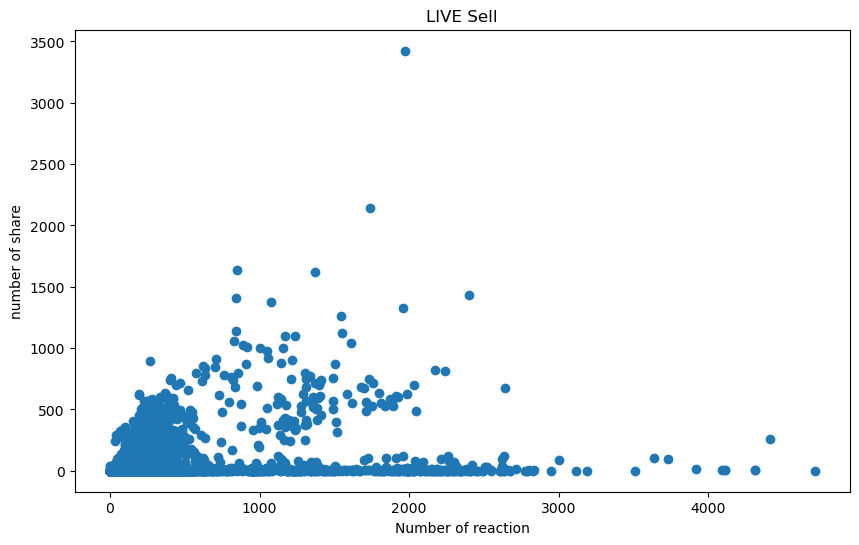

In [163]:
plt.figure(figsize=(10,6))
plt.scatter(df['num_reactions'],df['num_shares'])
plt.xlabel('Number of reaction')
plt.ylabel('number of share')
plt.title('LIVE Sell')

# **Declare feature vector and target variable**


In [164]:
df.head(2)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0


# **Convert categorical variable into integers** 


In [165]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df['status_type'] = le.fit_transform(df['status_type']) 

In [171]:
y=df
cols = y.columns

from sklearn.preprocessing import MinMaxScaler 
ms = MinMaxScaler()
y = ms.fit_transform(y)
y = pd.DataFrame(y, columns=[cols])

### View the summary of X

In [173]:
X = y.values
X[:5] # Show first 5 records only

array([[1.        , 0.11231423, 0.02439257, 0.07651869, 0.09171975,
        0.14003044, 0.01079137, 0.00636943, 0.01960784, 0.        ],
       [0.33333333, 0.03184713, 0.        , 0.        , 0.03184713,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.04819533, 0.01124345, 0.0166472 , 0.0433121 ,
        0.03196347, 0.00359712, 0.00636943, 0.        , 0.        ],
       [0.33333333, 0.02356688, 0.        , 0.        , 0.02356688,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.33333333, 0.04522293, 0.        , 0.        , 0.0433121 ,
        0.01369863, 0.        , 0.        , 0.        , 0.        ]])

### Preview the dataset X

# **Feature Scaling** 

C:\Users\mahmud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mahmud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mahmud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mahmud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mahmud\anaconda3\lib\site-packages\sklearn\

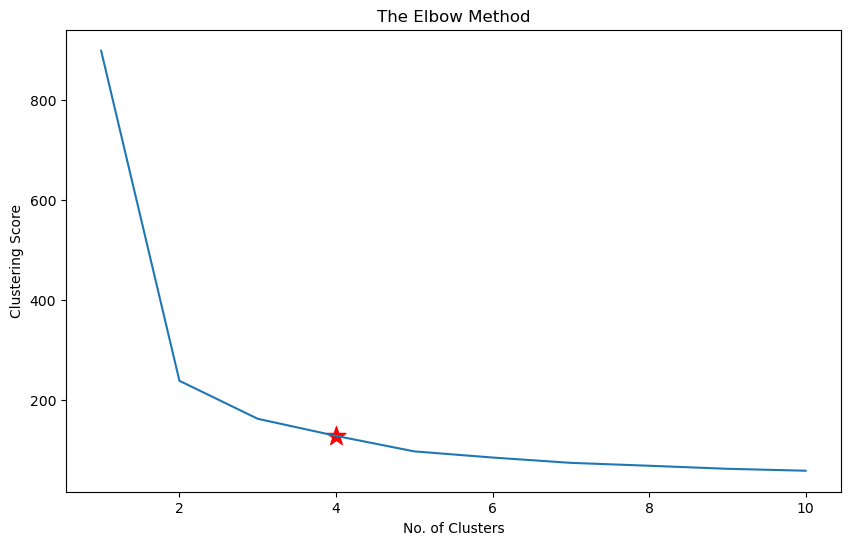

In [174]:

from sklearn.cluster import KMeans

clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.
    

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(4,clustering_score[3], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

# **K-Means model with five clusters** 

In [188]:
kmeans= KMeans(n_clusters = 5, random_state = 42)

# Compute k-means clustering
kmeans.fit(X)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X)

pred

C:\Users\mahmud\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 0, ..., 1, 1, 1])

In [189]:
df['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Number of data points in each cluster= \n', df['Cluster'].value_counts())
df

Number of data points in each cluster= 
 1    4131
0    2145
4     334
2     251
3     189
Name: Cluster, dtype: int64


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster
0,3,529,512,262,432,92,3,1,1,0,0
1,1,150,0,0,150,0,0,0,0,0,1
2,3,227,236,57,204,21,1,1,0,0,0
3,1,111,0,0,111,0,0,0,0,0,1
4,1,213,0,0,204,9,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0,1
7046,1,16,0,0,14,1,0,1,0,0,1
7047,1,2,0,0,1,1,0,0,0,0,1
7048,1,351,12,22,349,2,0,0,0,0,1


# Vizualization

Text(0.5, 1.0, 'Live selling')

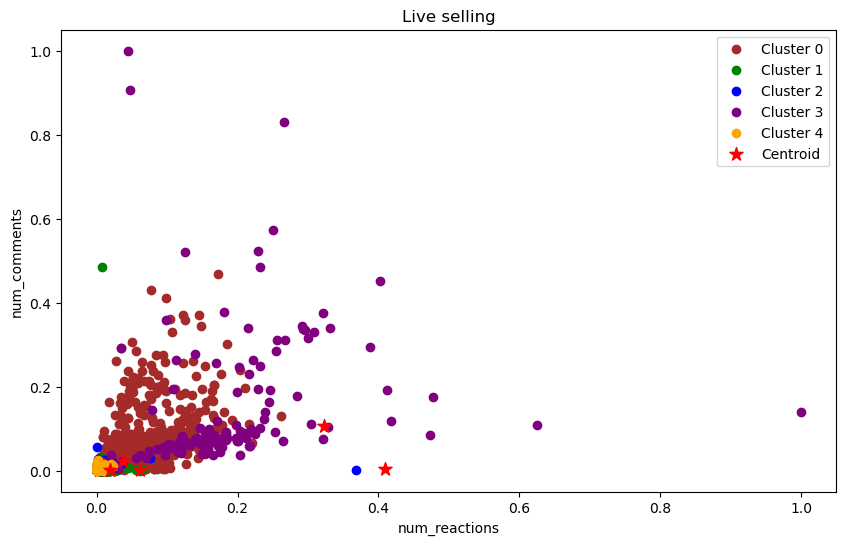

In [193]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 3], X[pred == 0, 2], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 3], X[pred == 1, 2], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 3], X[pred == 2, 2], c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 3], X[pred == 3, 2], c = 'purple', label = 'Cluster 3')
plt.scatter(X[pred == 4, 3], X[pred == 4, 2], c = 'orange', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:, 2],s = 100, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('num_reactions')
plt.ylabel('num_comments')
plt.legend()
plt.title('Live selling')

# K-Means model parameters study

In [194]:

labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_
labels1

array([0, 1, 0, ..., 1, 1, 1])

- The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as **inertia**, or within-cluster sum-of-squares Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.


- The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. The means are commonly called the cluster **centroids**.


- The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.

### Inertia


- **Inertia** is not a normalized metric. 

- The lower values of inertia are better and zero is optimal. 

- But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of `curse of dimensionality`). 

- Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

- We can calculate model inertia as follows:-

In [195]:
kmeans.inertia_

96.24989550305203

- The lesser the model inertia, the better the model fit.

- We can see that the model has very high inertia. So, this is not a good model fit to the data.